# ML CHALLENGE 2 - Cardiovascular Disease Prediction 


| <img src="D:\z2m\machine-learning\iNeuron\cvd\iNueron-Hackathon\CardioVascularDisease\images\heart.gif" width=300/> | 
|:--:| 
| Is cardiovascular heart disease in your future? |

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.


## 1. Problem Definition

To build an application to classify the patients to be healthy or suffering from cardiovascular disease based on the given attributes. In this case, the problem will be exploring **binary classification**. By evaluating a number of **features** regarding a patient can heart disease be predicted and thus, prevented through healthier lifestyle choices (features). 

In a statement,

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The data source was downloaded from [iNeuron's Machine Learning Challenge](https://challenge-ineuron.in/mlchallenge.php#) and [Kaggle] (https://www.kaggle.com/sulianova/cardiovascular-disease-dataset)


## 3. Evaluation

Per iNueron's Challenge website: 
> "This machine learning challenge has been created with the intent to engage the audience to participate. This also has the potential to bring out the best technical skill sets via the means of competitive learning and personal research. This challenge is to help the community learn and nurture together by creating a common platform for the exchange of ideas and solutions, and motivating the individuals and teams with appropriate rewards."

Solution Requirements
1. The problems are divided into 3 bundles each containing 3 problems. The candidate is to select one bundle out of these three and solve all three problems inside it. The solution can be deployed to any one of these cloud environments- Amazon AWS/ Microsoft Azure/ Google Cloud Platform as stated below:

ML Challenge 1 - Google Cloud Platform
ML Challenge 2 - Amazon AWS
ML Challenge 3 - Microsoft Azure.
2. A descriptive analysis of the given dataset and inferences drawn from the data along with Exploratory Data Analysis.

3. Thorough design documentation containing the solution design architecture right from the data ingestion(intake) till deployment.

4. A dedicated User Interface for testing the API for the bulk load as well as a single test instance.

5. Create and update detailed logs for all the training and prediction steps as well as detailed application logging with a robust exception handling framework.

6. A detailed Low-Level Design Document describing every step, method and module in detail, the final deployment process, sequence diagrams and failure point analysis.

7. A well-scripted retraining and application maintenance approach to make the application better, robust, and comparatively less prone to failures with time.

8. A descriptive video of project development and deployment process encompassing all the functionalities achieved through the project.


## 4. Features

### Heart Disease Data Dictionary

Dataset owner - Svetlana Ulianova

Date created - 2019-01-20

> Features:
1.	Age | Objective Feature | age | int (days)
2.	Height | Objective Feature | height | int (cm) |
3.	Weight | Objective Feature | weight | float (kg) |
4.	Gender | Objective Feature | gender | categorical code |
5.	Systolic blood pressure | Examination Feature | ap_hi | int |
6.	Diastolic blood pressure | Examination Feature | ap_lo | int |
7.	Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8.	Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9.	Smoking | Subjective Feature | smoke | binary |
10.	Alcohol intake | Subjective Feature | alco | binary |
11.	Physical activity | Subjective Feature | active | binary |
12.	Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

## Preparing the tools

We're going to use [pandas](https://pandas.pydata.org/), [Matplotlib](https://matplotlib.org/) and [NumPy](https://numpy.org/) for data analysis and manipulation along with [Scikit-Learn](https://scikit-learn.org/stable/) and [XgBoost](https://xgboost.readthedocs.io/en/latest/) for machine learning modelling and evaluation.

In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

# display all visible columns of dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
import xgboost as xgb

## Load data 

In [7]:
data = pd.read_csv("D:\z2m\machine-learning\iNeuron\cvd\iNueron-Hackathon\CardioVascularDisease\cvd_data\cardio_train.csv", sep=';')
data.shape # (rows, columns)

(69301, 13)

In [8]:
print('------ 13 total attributes --------')
data.sample(10)

------ 13 total attributes --------


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
38892,56563,17670,2,168,56.0,110,80,1,1,0,0,1,0
24832,36430,19055,1,157,70.0,130,70,1,1,0,0,0,0
22,1018,20465,1,162,88.0,160,90,2,1,0,0,1,1
27007,39603,19633,1,164,68.0,120,80,1,1,0,0,1,0
41324,60023,21910,1,155,78.0,130,90,1,1,0,0,1,1
7608,11856,16712,1,153,56.0,110,80,1,1,0,0,1,0
8871,13639,16092,2,178,92.0,120,80,1,1,1,0,1,0
61936,89430,23458,1,162,95.0,130,90,1,1,0,0,1,1
12957,19491,21105,1,168,81.0,130,80,3,3,0,0,1,0
3159,5462,20927,2,160,49.0,80,60,1,1,1,0,0,0


## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and get an understanding of..

1. What question(s) are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Identifying and dealing with outliers
5. Add, change or remove features to get more out of your data?
6. Potential relationship between the variables and the target: `cardio`

###  Identify the target variable to determine which variables can accurately predict which patient record will contain the presence or absence of the target variable (binary): `cardio`

In [9]:
# `cardio` is what we will be predicting
target = 'cardio'

In [10]:
# Number of target instances - Relatively equal proportion
data["cardio"].value_counts(), data['cardio'].value_counts(normalize=True)

(0    34679
 1    34622
 Name: cardio, dtype: int64,
 0    0.500411
 1    0.499589
 Name: cardio, dtype: float64)

Balanced Classes
> Target Variable: 34,679 (50.04%) clear patients and 34,622 (49.96) at risk.

Note: Conveniently, the dataset target variable 'cardio' is very balanced with an approximate 50/50 % split between cases present with cardiovascular disease and those without. Balanced classes allows for the optimization of metrics during and following the modelling stages. 

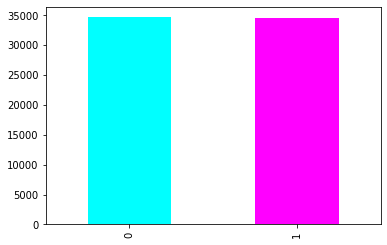

In [11]:
# Visualize the proportionality of target variable
data["cardio"].value_counts().plot(kind="bar", color=['aqua', "fuchsia"]);

### Check for duplicate, missing, or unneccessary attributes

In [12]:
print('Number of Id labels: ', len(data.id.unique()))
print('Number of patient records in the dataset: ', len(data))

Number of Id labels:  69301
Number of patient records in the dataset:  69301


With an `id` label for every record, we can drop this column during the modelling phase as this feature doesn't contribute to predicting `cardio`.

In [13]:
print("{} duplicated values in data frame".format(data.duplicated().sum()))

0 duplicated values in data frame


No duplicates present, but we will treat potential duplicates when preparing the data for modelling phase.

In [14]:
# Are there any missing values?
pd.DataFrame(data.isna().mean()).style.format("{:.1%}")

,0
id,0.0%
age,0.0%
gender,0.0%
height,0.0%
weight,0.0%
ap_hi,0.0%
ap_lo,0.0%
cholesterol,0.0%
gluc,0.0%
smoke,0.0%


The dataset is not missing any values. 

### Types of variables in the dataset

In [15]:
print('------ top 8 --------')
data.head(8)

------ top 8 --------


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
5,995,21143,1,164,61.0,100,70,1,1,0,0,1,0
6,996,18085,1,162,72.0,100,70,1,1,0,0,1,0
7,997,22547,1,161,93.0,140,90,2,1,0,0,1,1


In [16]:
# check again for datatypes
num_vars = [c for c in data.columns if data[c].dtypes!='O' and c!=target]

cat_vars = [c for c in data.columns if data[c].dtypes=='O']

print('Number of numerical variables: {}'.format(len(num_vars)))
print('Number of categorical variables: {}'.format(len(cat_vars)))

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables: 12
Number of categorical variables: 0


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,988,22469,1,155,69.0,130,80,2,2,0,0,1
1,989,14648,1,163,71.0,110,70,1,1,0,0,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1
3,991,14549,2,165,85.0,120,80,1,1,1,1,1
4,992,23393,1,155,62.0,120,80,1,1,0,0,1


The dataset consists of only numerical variables.

In [17]:
data.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [18]:
# inspect the values for each variable
for var in data.columns:
    print(var, data[var].unique()[0:20], '\n')

id [ 988  989  990  991  992  995  996  997  999 1000 1001 1002 1003 1004
 1006 1008 1010 1011 1013 1014] 

age [22469 14648 21901 14549 23393 21143 18085 22547 21250 22446 16621 20442
 23168 22598 20317 23558 20219 19559 20006 19054] 

gender [1 2] 

height [155 163 165 164 162 161 157 158 153 169 150 176 154 159 146 167 170 151
 183 160] 

weight [ 69.  71.  70.  85.  62.  61.  72.  93.  68.  65.  57.  82.  56.  60.
  45.  90.  74.  88.  95. 103.] 

ap_hi [130 110 120 100 140 160 170 150 147 115  90 180  14 125 135 190 137 153
  11 145] 

ap_lo [  80   70   90  100 1000   60   79   78  110   84   75 1100   85   86
   87 1001   82   95   69   74] 

cholesterol [2 1 3] 

gluc [2 1 3] 

smoke [0 1] 

alco [0 1] 

active [1 0] 

cardio [0 1] 



We can see most of the attributes are continuous while several are discrete. Knowing `ap_lo` corresponds to diastolic blood pressure, we can see values > 1000 suggesting there are outliers present which will be dealt with later in this notebook. The variable `id` which is a unique identifier for each patient isn't a variable to be used for making predictions. Therefore, I'll drop that column as there's one different value for each record, i.e. each patient record. See below:

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,69301.0,50471.480397,28563.100347,988.0,25745.0,50494.0,75150.0,99999.0
age,69301.0,19468.786280,2467.261818,10798.0,17664.0,19704.0,21326.0,23713.0
gender,69301.0,1.349519,0.476821,1.0,1.0,1.0,2.0,2.0
height,69301.0,164.362217,8.205337,55.0,159.0,165.0,170.0,250.0
weight,69301.0,74.203027,14.383469,10.0,65.0,72.0,82.0,200.0
ap_hi,69301.0,128.829584,154.775805,-150.0,120.0,120.0,140.0,16020.0
ap_lo,69301.0,96.650092,189.096240,-70.0,80.0,80.0,90.0,11000.0
cholesterol,69301.0,1.366806,0.680270,1.0,1.0,1.0,2.0,3.0
gluc,69301.0,1.226447,0.572246,1.0,1.0,1.0,1.0,3.0
smoke,69301.0,0.088051,0.283371,0.0,0.0,0.0,0.0,1.0


Again, the attributes `ap_hi`, `ap_lo` mean/min/max values appear too high which we can address in the Outliers section.

#### Discrete Variables
Which variables are discrete with less than 5 values/labels (an arbitrary value that is satisfactory for this dataset)

In [20]:
# selecting columns with less than 5 distinct values
discrete_vars = [
    var for var in num_vars if len(data[var].unique())<5]

print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  6


In [21]:
# visualise the discrete variables
data[discrete_vars].head()

,gender,cholesterol,gluc,smoke,alco,active
0,1,2,2,0,0,1
1,1,1,1,0,0,1
2,1,1,1,0,0,1
3,2,1,1,1,1,1
4,1,1,1,0,0,1


In [22]:
data[discrete_vars].nunique()

gender         2
cholesterol    3
gluc           3
smoke          2
alco           2
active         2
dtype: int64

These discrete variables are either binary (4 attributes) or ranking labels (2 attributes). 

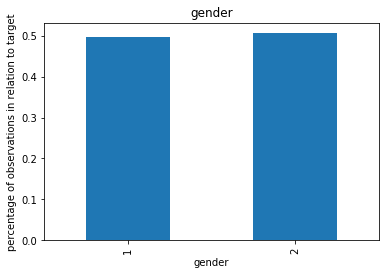

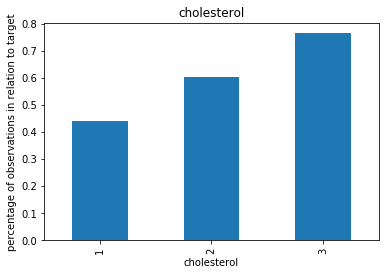

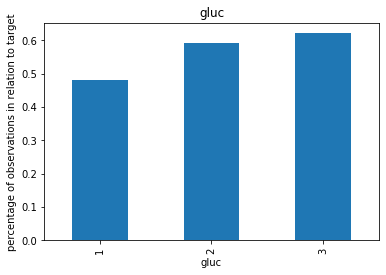

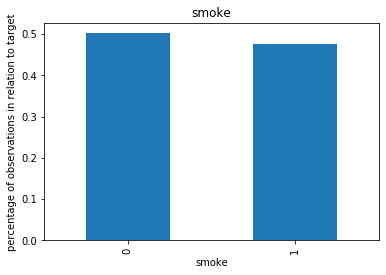

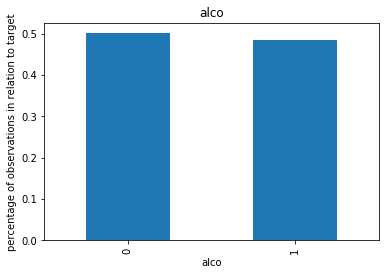

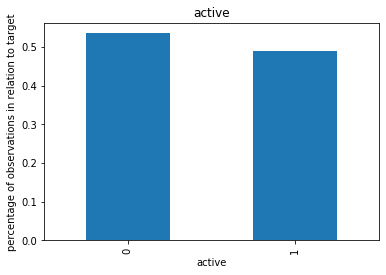

In [23]:
def analyse_discrete(data, var):
    """
    function plots mean `cardio` for each discrete category
    """
    data = data.copy()
    data.groupby(var)['cardio'].mean().plot.bar()
    plt.title(var)
    plt.ylabel('percentage of observations in relation to target')
    plt.show()
    
for var in discrete_vars:
    analyse_discrete(data, var)

Intuitively, there is a positive relationship between `cholesterol` and `gluc` such that as those variables increase, so does the average rate for cardiovascular disease in patients. Also, as seen in the count plots below, there are notable disproportionate variables such as almost twice as many female patient records compared to males and the majority of patients abstaining from alcohol use or smoking cigarettes. Also, most patients describe themselves as being active.

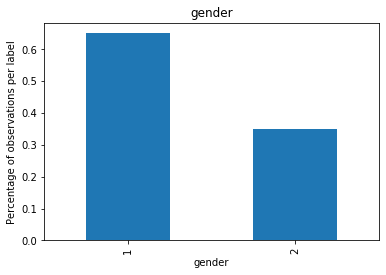

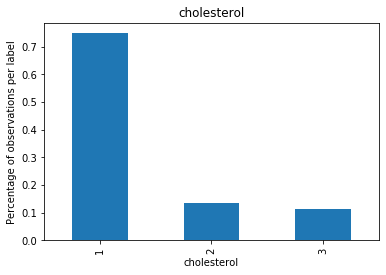

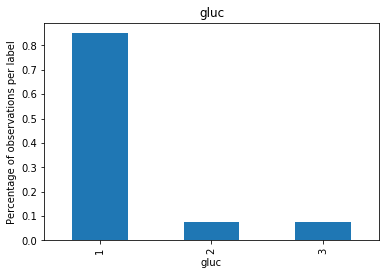

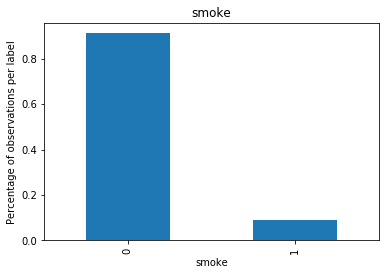

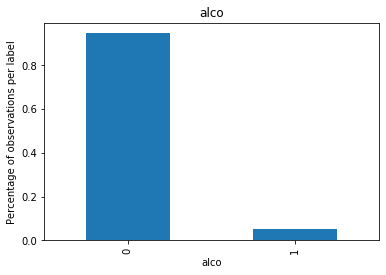

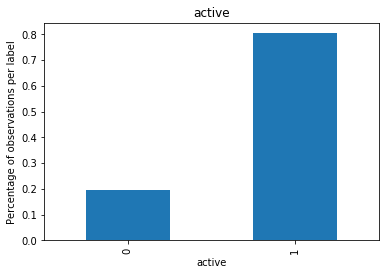

In [24]:
for var in discrete_vars:
    (data.groupby(var)[var].count() / np.float(len(data))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()

#### An in-depth look at gender

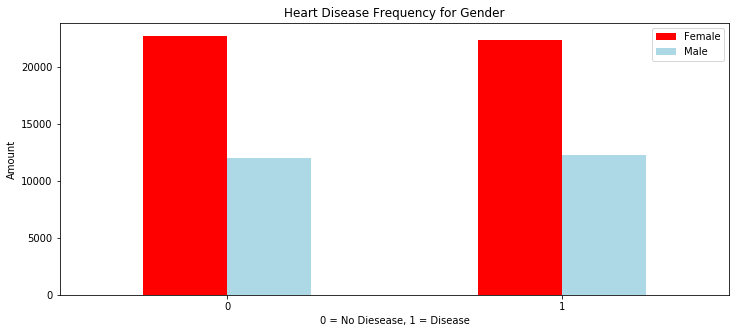

In [25]:
# Create a plot of crosstab
pd.crosstab(data.cardio, data.gender).plot(kind="bar",
                                    figsize=(12, 5),
                                    color=["red", "lightblue"])

plt.title("Heart Disease Frequency for Gender")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

With twice as many female patients, the relative proportion of those with cardiovascular disease is consistent across gender.

#### An in-depth look at age 

In [26]:
print("The average patient's age is {} years old. \n".format(round(data.age.mean()/365,1)))

The average patient's age is 53.3 years old. 



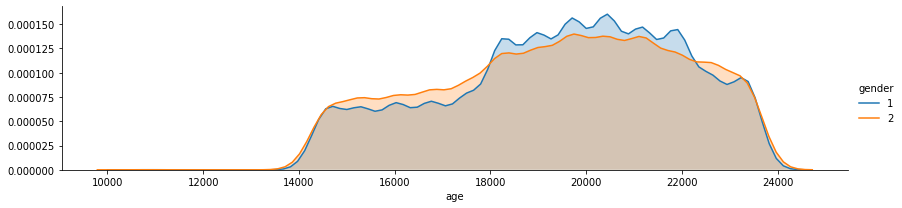

In [27]:
# Taking a closer look at the gender spread across days old
fig = sns.FacetGrid(data,hue='gender',aspect=4)
fig.map(sns.kdeplot,'age',shade=True)
oldest = data['age'].max()
fig.add_legend();

The age distribution shows the varying ages between <font color=orange>males</font> and <font color=blue>females</font> fluctuate especially females showing ripple patterns.

#### Continuous Variables
Observe the overall distribution of continuous variables. Continuous variables will contain all of the other features remaining in this dataset.

In [28]:
# list of continuous variables
cont_vars = [
    var for var in num_vars if var not in discrete_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  6


In [29]:
# Visualise the continuous variables

data[cont_vars].head(5)

,id,age,height,weight,ap_hi,ap_lo
0,988,22469,155,69.0,130,80
1,989,14648,163,71.0,110,70
2,990,21901,165,70.0,120,80
3,991,14549,165,85.0,120,80
4,992,23393,155,62.0,120,80


In [30]:
# of different values
data[cont_vars].nunique()

id        69301
age        8069
height      108
weight      285
ap_hi       153
ap_lo       157
dtype: int64

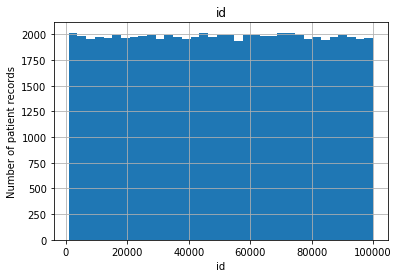

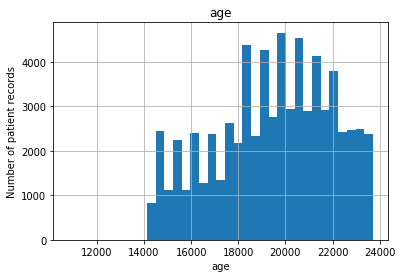

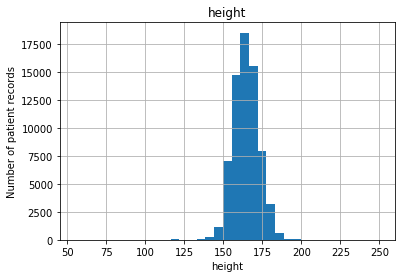

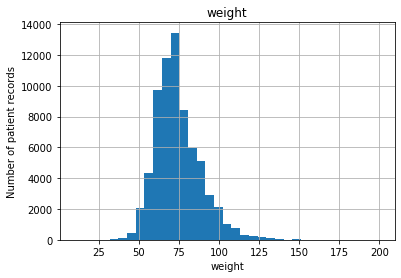

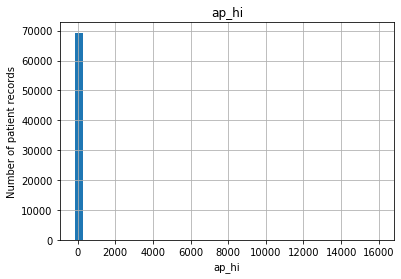

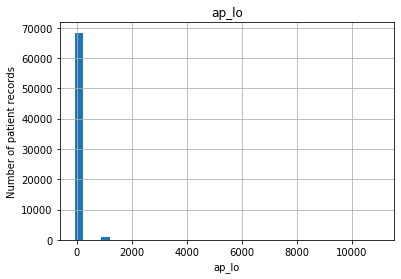

In [31]:
# Analysis for the distributions of continuous variables

def analyse_continuous(data, var):
    data = data.copy()
    data[var].hist(bins=35)
    plt.ylabel('Number of patient records')
    plt.xlabel(var)
    plt.title(var)
    plt.show()


for var in cont_vars:
    analyse_continuous(data, var)

`height` (cm) looks normally distributed. `weight` shows a slight but noticeable postive skew towards heavier weights (kg). `age` (days old) shows a negative skew with more patient records above 50 years of age. `age` and `weight` will be further investigated in the following Correlation section. 

* `id` column will be discarded

## Correlation
> Visualizing the correlation of our independent variables 

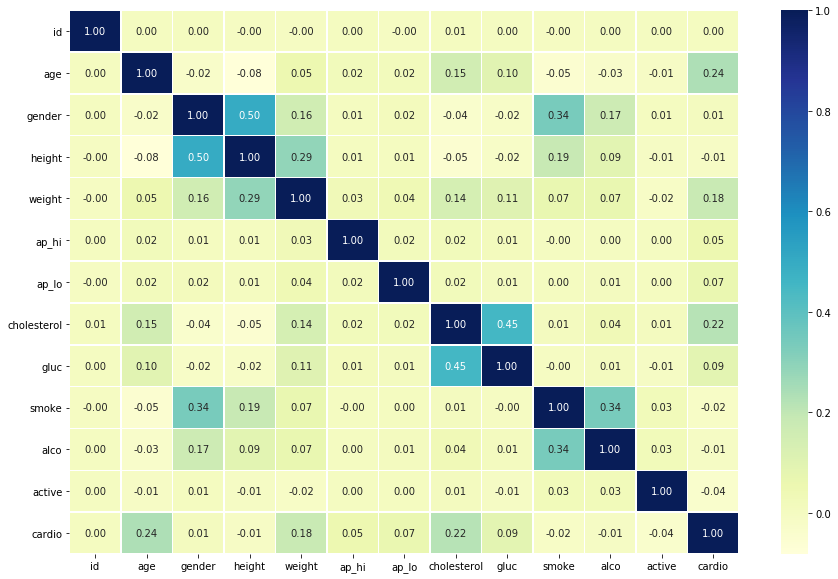

In [32]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap='YlGnBu');

A higher positive value (1.00 highest) correspondes to a __<font color=aquamarine>positive correlation</font>__ and lower values correspond to variables with correlations with <font color=lemonchiffon>zero/negative correlation</font>. Features like age, cholesterol, blood pressure, and weight are correlated with the target value. With seaborn's visualizations, we can go ahead and observe how these variables impact one another. 

### `age` vs `cardio`

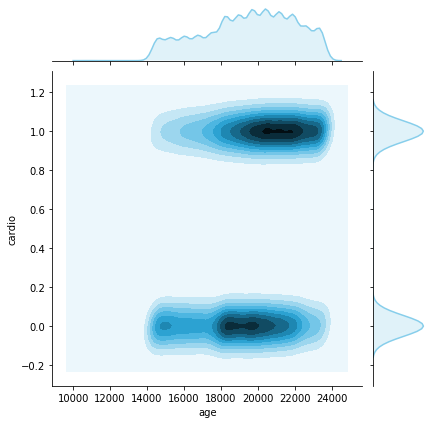

In [33]:
sns.jointplot(x="age", y="cardio", data=data, kind="kde", color="skyblue");

The concentration for cardiovascular disease peaks near 22,000 days old (~60 years). In the graph below, we can see a higher proportion of those overweight having cardiovascular disease. Near 125 kg (275 lbs) the proportion of disease increases across ages.

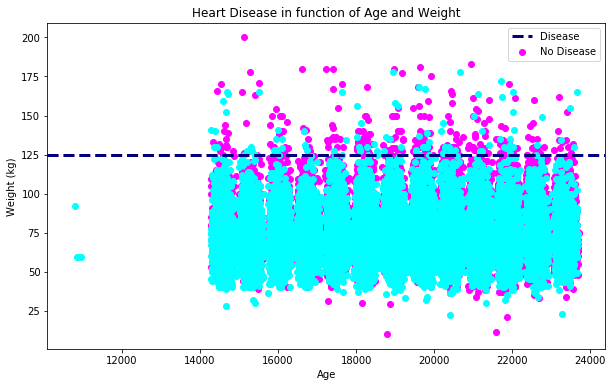

In [34]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(data.age[data.cardio==1],
            data.weight[data.cardio==1],
            c="fuchsia")

# Scatter with negative examples
plt.scatter(data.age[data.cardio==0],
            data.weight[data.cardio==0],
            c="aqua")

# Add some helpful info
plt.title("Heart Disease in function of Age and Weight")
plt.axhline(125, ls='--', linewidth=3, color='navy')
plt.xlabel("Age")
plt.ylabel("Weight (kg)")
plt.legend(["Disease", "No Disease"]);

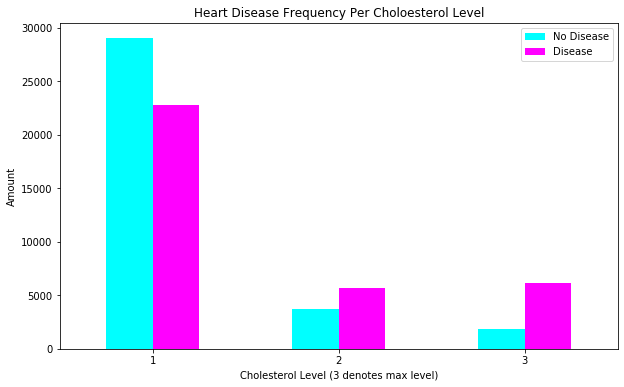

In [35]:
# Make the crosstab more visual
pd.crosstab(data.cholesterol, data.cardio).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["aqua", "fuchsia"])

# Add some communication
plt.title("Heart Disease Frequency Per Choloesterol Level")
plt.xlabel("Cholesterol Level (3 denotes max level)")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

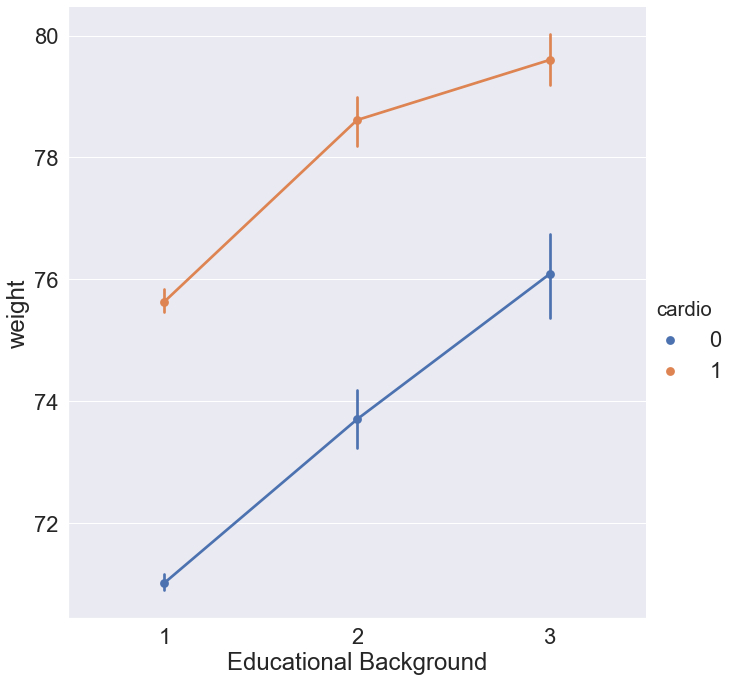

In [36]:
sns.set(font_scale=2)
sns.set_style("darkgrid")
sns.catplot(x="cholesterol", y="weight", hue = "cardio", kind = "point", data=data, height=10, aspect=0.95)

plt.xlabel("Educational Background");

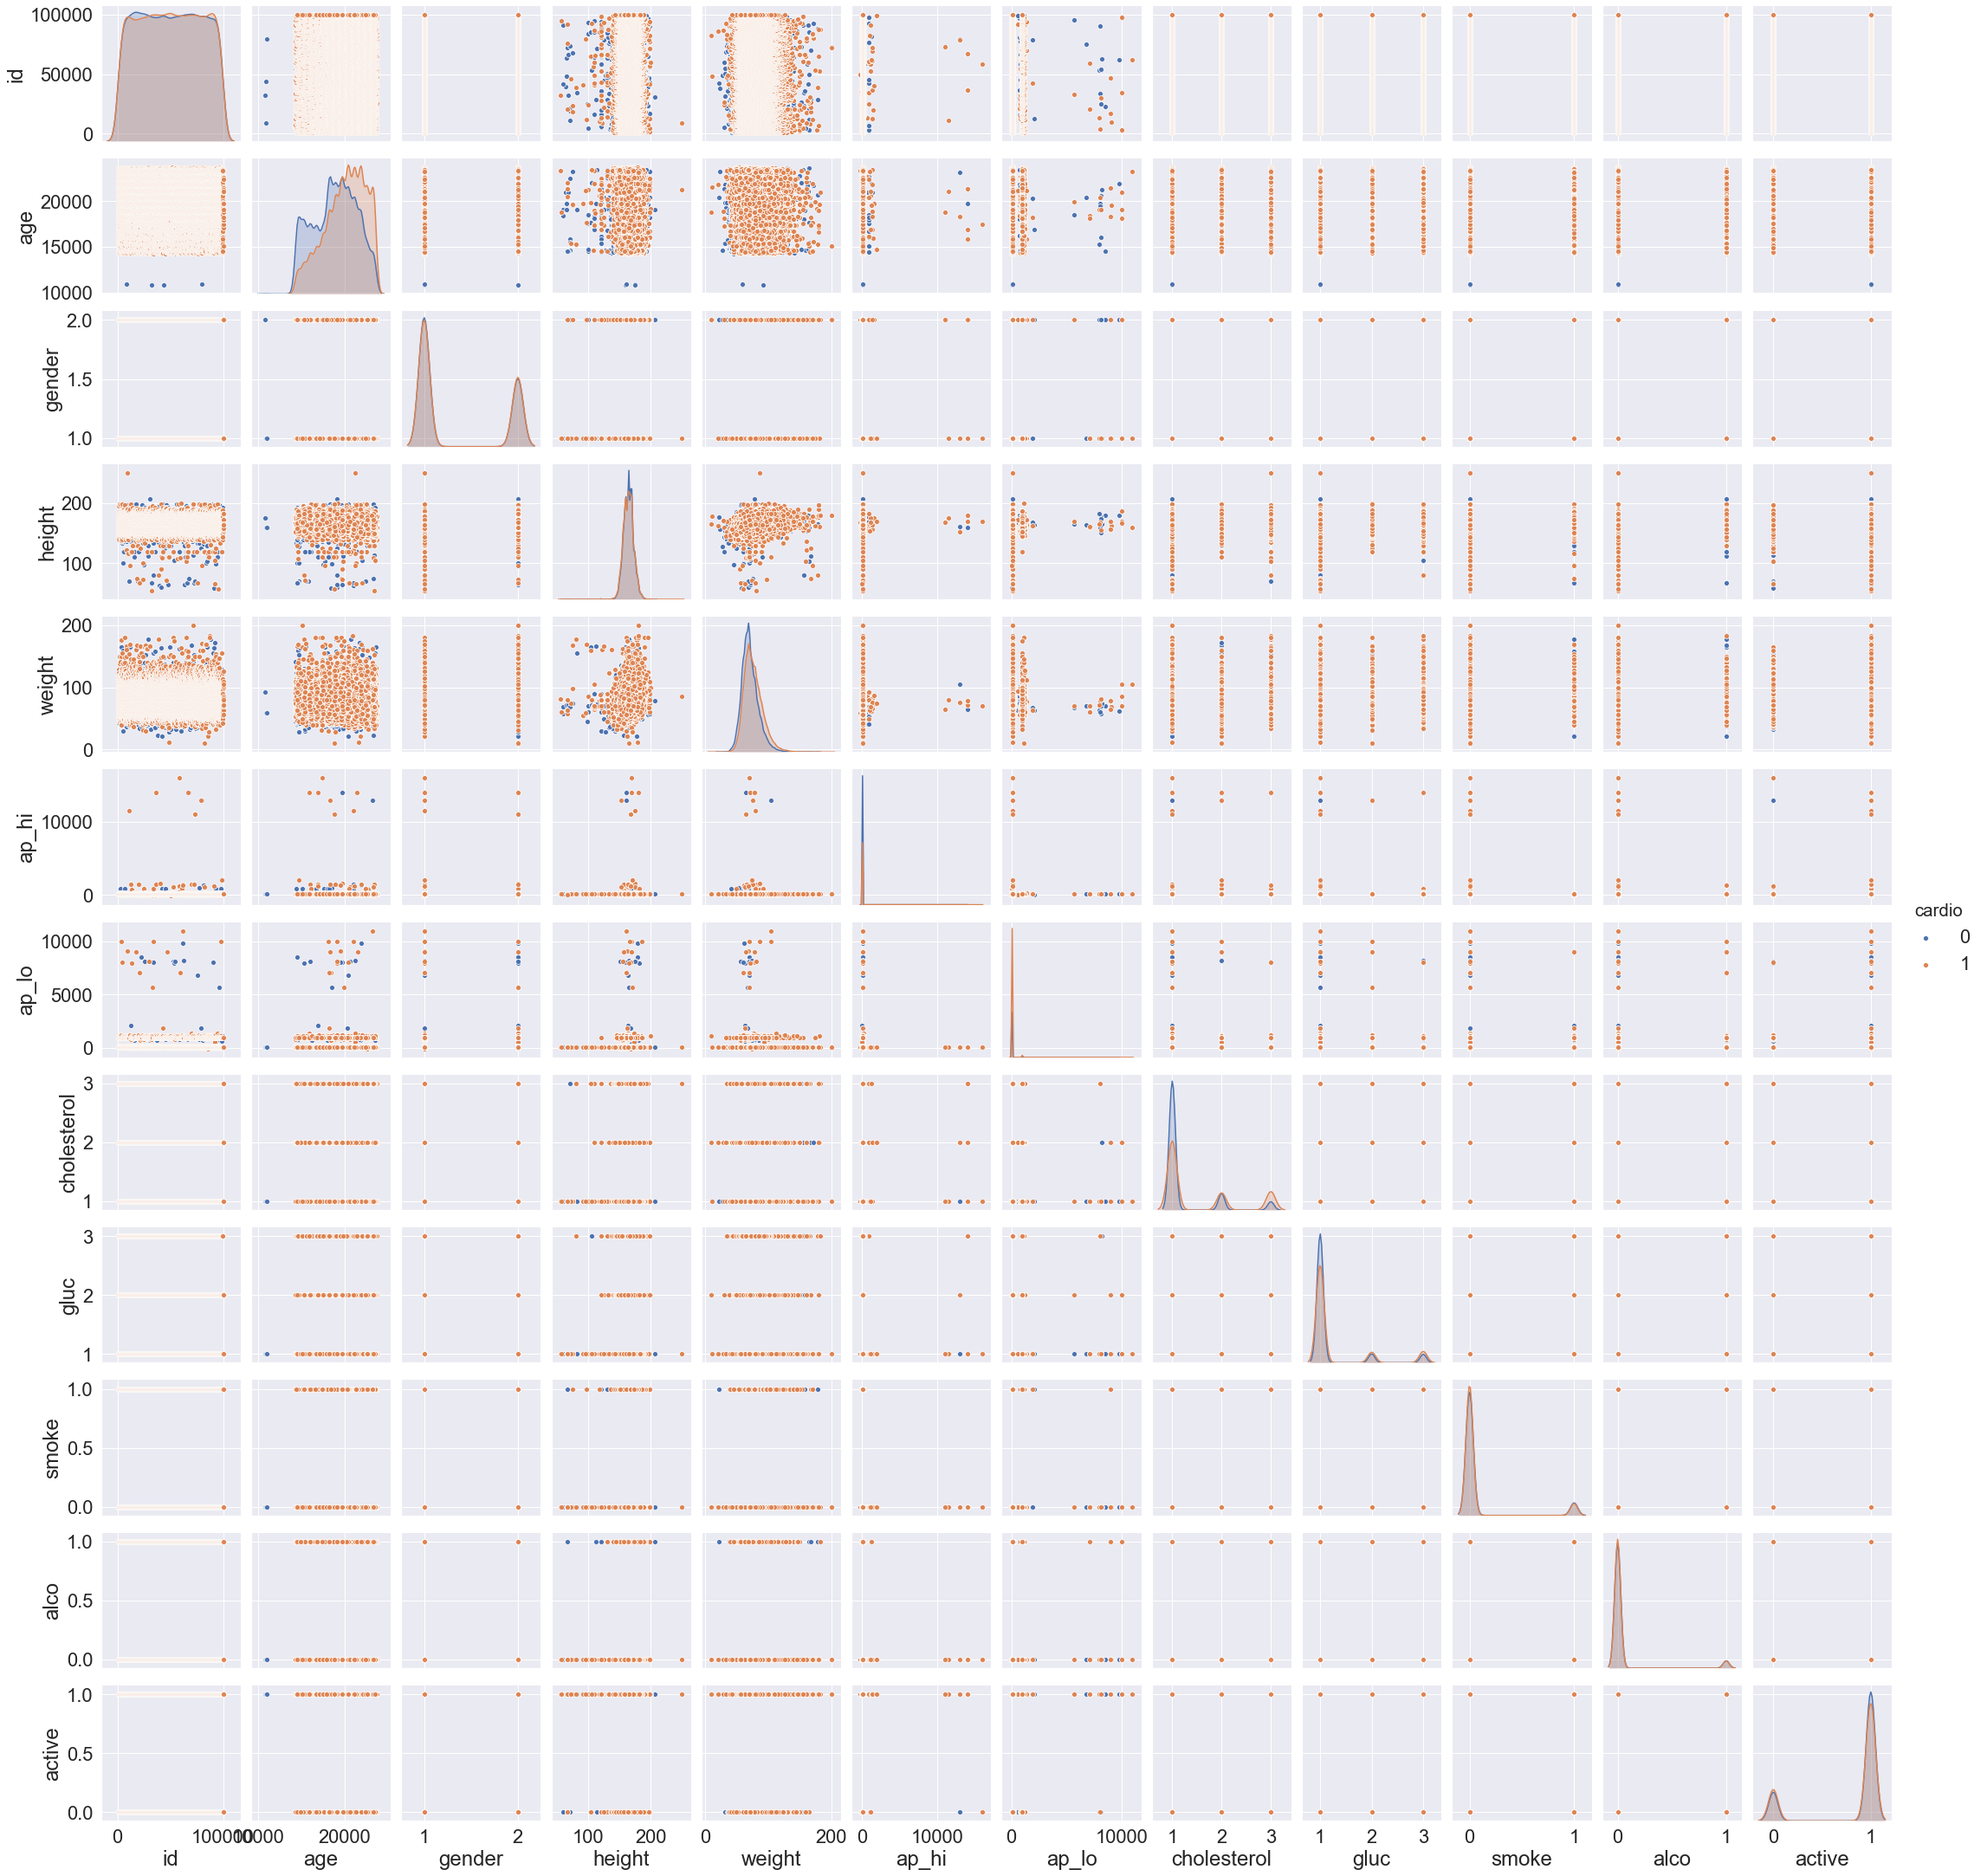

In [37]:
sns.pairplot(data, hue='cardio');

## Outliers
Extreme values could affect modeling performance. 

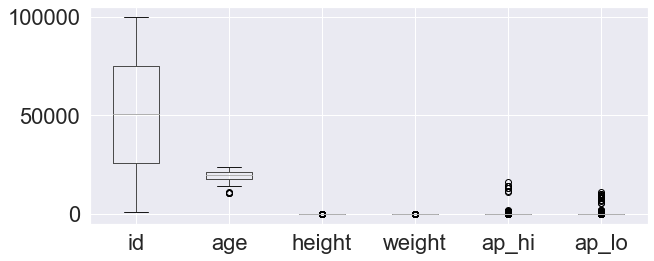

In [38]:
data[cont_vars].boxplot(figsize=(10,4));

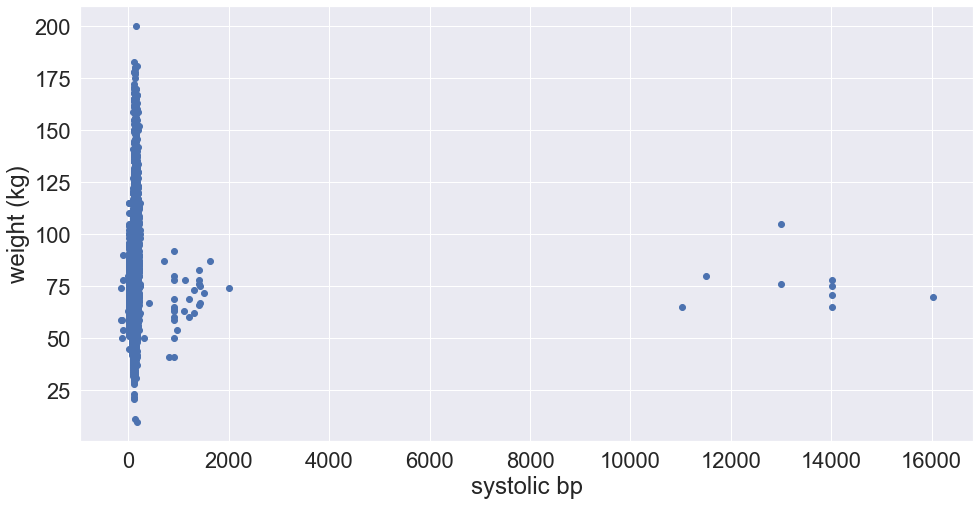

In [39]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['ap_hi'], data['weight'])
ax.set_xlabel('systolic bp')
ax.set_ylabel('weight (kg)')
plt.show()

In [40]:
data['ap_hi'].skew(), data['ap_lo'].skew(), data['age'].skew(), data['height'].skew(), data['weight'].skew()

(84.88614414413018,
 32.10154552210334,
 -0.3073876269101056,
 -0.6340396246539031,
 1.005120415536906)

We can see the `ap_hi` and `ap_lo` attributes are heavily right-skewed distributed indicating the presence of extreme high values while `age` and `height` have minor left-skew indicating presence of extraordinarily low values. Also observed from the boxplot above.

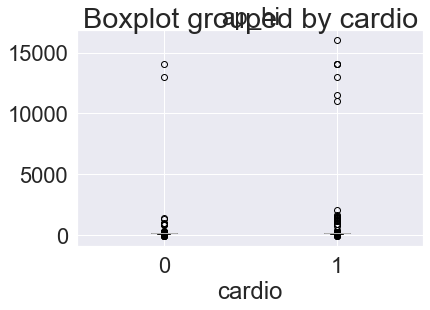

In [41]:
data.boxplot(column='ap_hi', by='cardio');

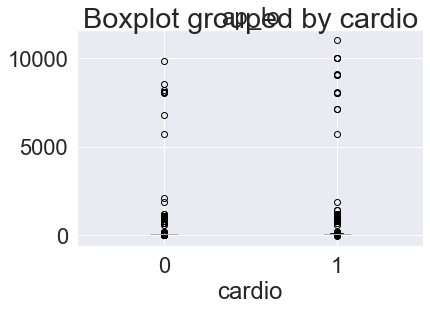

In [42]:
data.boxplot(column='ap_lo', by='cardio');

For both cases `ap_hi` and `ap_lo` we can observe some extreme values. 
> since blood pressure is positively correlated with cardiovascular disease, we will seek to only eliminate extreme readings (~sbp > 250 and dbp > 200) 

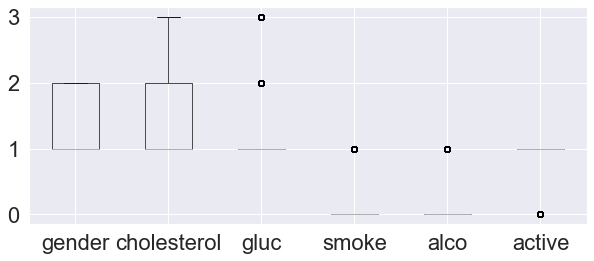

In [43]:
data[discrete_vars].boxplot(figsize=(10,4));

In [44]:
data['gender'].skew(), data['cholesterol'].skew(), data['gluc'].skew(), data['smoke'].skew(), data['alco'].skew(), data['active'].min()

(0.6312030734588667,
 1.5874801355761525,
 2.39752020719182,
 2.9075787456783435,
 3.9518450247997032,
 0)

None of the discrete variables show extremely heavy skewness. So, the main outliers identified are `ap_lo` and `ap_hi`.

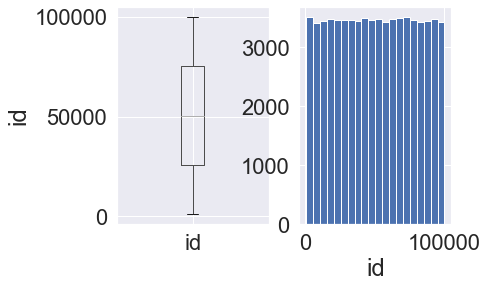

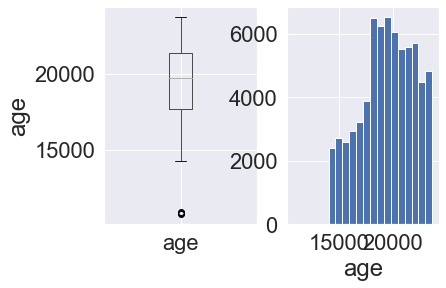

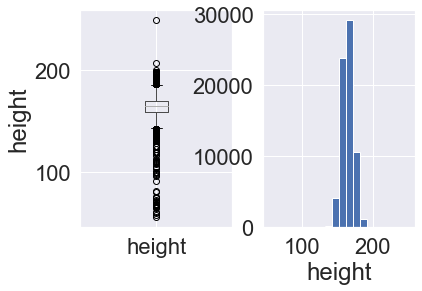

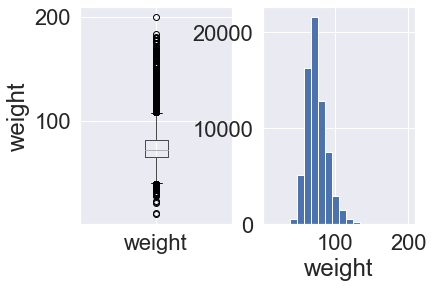

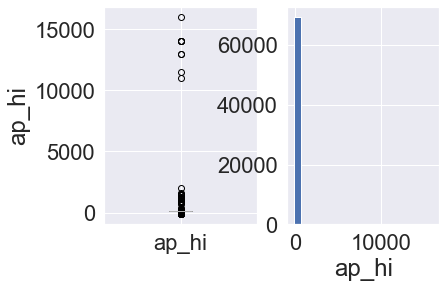

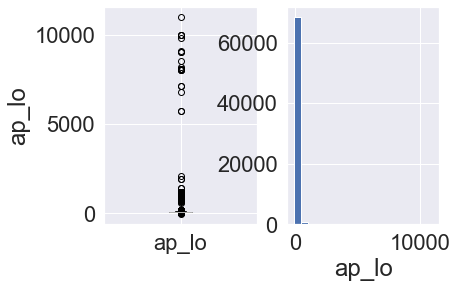

In [45]:
# side-by-side boxplots and histograms for visualizing the continuous variables 

for var in cont_vars:
    plt.figure(figsize=(6,4))
    plt.subplot(1, 2, 1)
    fig = data.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = data[var].hist(bins=20)
    fig.set_xlabel(var)

    plt.show()

The majority of continuous variables appear to contain outliers. Additionally, the majority of variables are not normally distributed. To tackle these issues and improve model performance, it's worth noting the application of robust feature scaling from sci-kit learn to center the median at zero and handle data with robust outliers which we see here. This feature will be implemented during the train/test split for modelling phase.

In [46]:
# function to create histogram, Q-Q plot and
# boxplot. We learned this in section 3 of the course


def diagnostic_plots(data, var):
    # function takes a dataframe (data) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(data[var], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    st.probplot(data[var], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=data[var])
    plt.title('Boxplot')

    plt.show()

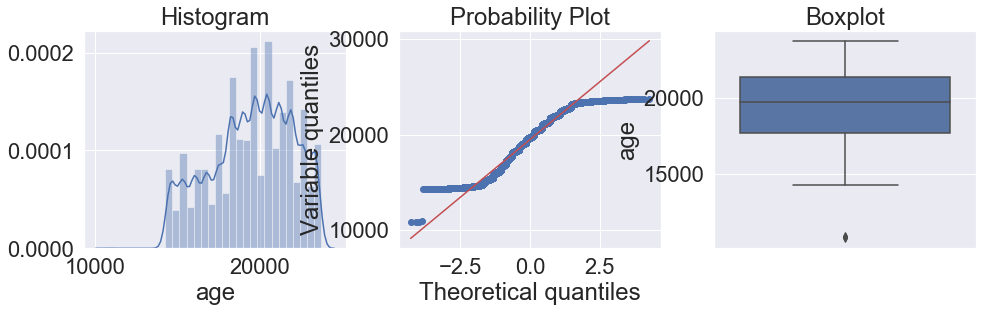

In [47]:
# let's find outliers in age
diagnostic_plots(data, 'age')

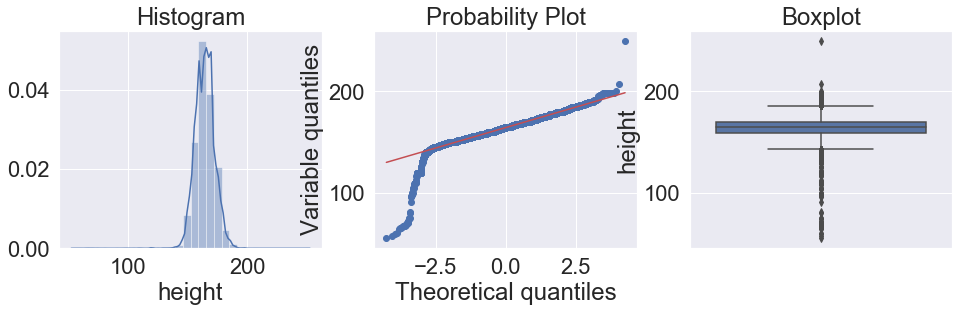

In [48]:
# let's find outliers in height
diagnostic_plots(data, 'height')

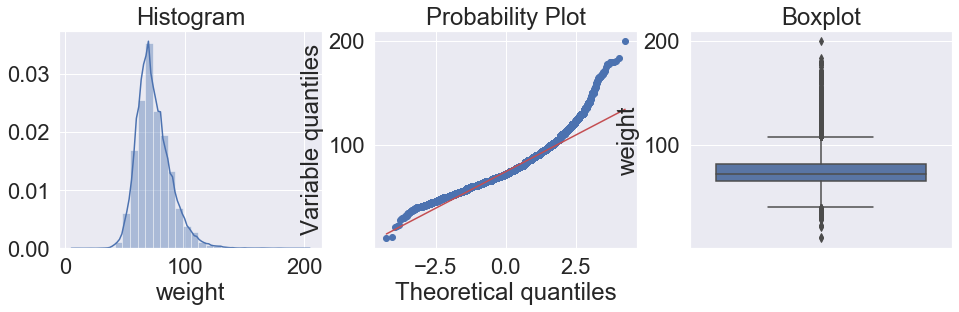

In [49]:
# let's find outliers in weight
diagnostic_plots(data, 'weight')

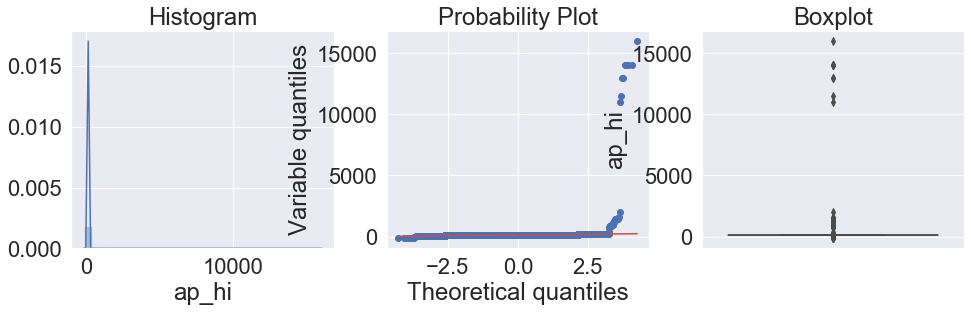

In [50]:
# let's find outliers in systolic BP
diagnostic_plots(data, 'ap_hi')

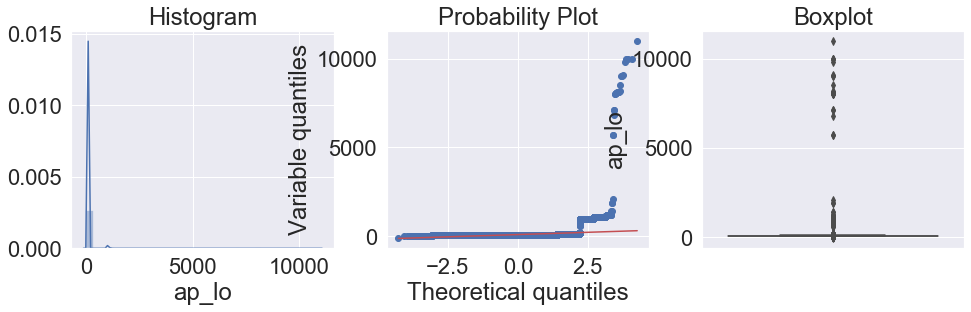

In [51]:
# let's find outliers in diastolic BP
diagnostic_plots(data, 'ap_lo')

There are outliers in all of the 5 continuous variables. `age` has outliers in only the left tail, `height` and `weight` shows outliers in both tails, `ap_lo` and `ap_hi` (BP readings) show outliers mainly in the right tail. Using IQR rules (upper/lower boundary limits), we can investigate which extreme outliers are worth investigating further for possible elimination. 

<!-- <img src="images\outlier.png" width=600/> -->
<img style="float: left" src="images\outlier.png"/>

In [47]:
def find_skewed_boundaries(data, var, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = data[var].quantile(0.75) - data[var].quantile(0.25)

    lower_boundary = data[var].quantile(0.25) - (IQR * distance)
    upper_boundary = data[var].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

#### Comparing upper/lower boundaries versus max/min values

* The max/min values for `age` fall within the boundary limits.

In [48]:
# find limits for age (in days)
age_upper_limit, age_lower_limit = find_skewed_boundaries(data, 'age', 3.0)

print("AGE \nUpper boundary: {}   Max: {} \nLower boundary: {}    Min: {} \n".format(age_upper_limit, data['age'].max(), age_lower_limit, data['age'].min()))

AGE 
Upper boundary: 32312.0   Max: 23713 
Lower boundary: 6678.0    Min: 10798 



* Here we have max/min values falling outside the 4 times IQR range. A minimum height of 55 cm equates to less than 2 feet tall. Considering the youngest patient is at least 29 years old, it is difficult to justify this entry as anything but an error. The world's tallest man reaches the upper `height` boundary so we will only cap by the lower boundary.

In [49]:
# find limits for height (cm)
ht_upper_limit, ht_lower_limit = find_skewed_boundaries(data, 'height', 3.0)

print("HEIGHT \nUpper boundary: {}   Max: {} \nLower boundary: {}   Min: {} \n".format(ht_upper_limit, data['height'].max(), ht_lower_limit, data['height'].min()))

HEIGHT 
Upper boundary: 203.0   Max: 250 
Lower boundary: 126.0   Min: 55 



I wish I could say since the max weight of 200 kg (~441 lbs) is too high, but it is within the realm of possibility. A min weight of 10 kg isn't. So, we will cap the bottom limit.

In [50]:
# find limits for weight (kg)
wt_upper_limit, wt_lower_limit = find_skewed_boundaries(data, 'weight', 3.0)

print("Weight \nUpper boundary: {}   Max: {} \nLower boundary: {}    Min: {} \n".format(wt_upper_limit, data['weight'].max(), wt_lower_limit, data['weight'].min()))

Weight 
Upper boundary: 133.0   Max: 200.0 
Lower boundary: 14.0    Min: 10.0 



* Since blood pressure is a very strong indicator for cardiovascular disease, we will only cap the max upper values at the max pressure record of <a href="https://www.ncbi.nlm.nih.gov/pubmed/7741618">370/360</a> and remove any erroneous negative readings in both the diastolic and systolic data.

In [51]:
# find limits for systolic BP (mg/dl)
# identifying those extreme outliers by multiplying IQR by 3 instead of 1.5
sbp_upper_limit, sbp_lower_limit = 400,20

print("systolic bp \nUpper boundary: {}   Max: {} \nLower boundary: {}    Min: {} \n".format(sbp_upper_limit, data['ap_hi'].max(), sbp_lower_limit, data['ap_hi'].min()))

systolic bp 
Upper boundary: 400   Max: 16020 
Lower boundary: 20    Min: -150 



In [52]:
# find limits for diastolic BP (mg/dl)
# identifying those extreme outliers by multiplying IQR by 3 instead of 1.5
dbp_upper_limit, dbp_lower_limit = 400,20

print("diastolic bp \nUpper boundary: {}   Max: {} \nLower boundary: {}    Min: {} \n".format(dbp_upper_limit, data['ap_lo'].max(), dbp_lower_limit, data['ap_lo'].min()))

diastolic bp 
Upper boundary: 400   Max: 11000 
Lower boundary: 20    Min: -70 



Even while setting lower/upper boundaries, the `ap_lo` and `ap_hi` data contain a multitude of anomalies (readings less than 20 mg/dl or greater than 350 mg/dl). Since the `cardio` feature is sensitive and highly correlated to blood pressure readings, we will only eliminate those records where the values are outside possible measurements (this will be tackled later). 

For further reading, the Harvard blood pressure guideline states that measures above 180 and 120 mm HG are considered the limits requiring immediate medical attention. 

Note~ With too many anomalies, we have to question the accuracy of the dataset in general. Also, with feature scaling, we will be reducing the impact of significant outliers. 

In [53]:
from IPython.display import IFrame
IFrame('https://www.health.harvard.edu/heart-health/reading-the-new-blood-pressure-guidelines', width=800, height=450)

## 5. Modelling 

### Split data into training (~ `id` and `cardio`) and testing sets
> Following the EDA and data cleansing process, it's time to split the data prior to performing any feature engineering (i.e. removing outliers and adding features)

In [52]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, data['cardio'],
                                                    test_size=0.15,
                                                    random_state=8)

# Sanity check - X_train + X_test = # of data records
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((58905, 13), (58905,), (10396, 13), (10396,))

### Treating Duplicates

In [53]:
print("There are {} duplicated values in data frame".format(X_train.duplicated().sum()))
print("There are {} duplicated values in data frame".format(X_test.duplicated().sum()))

There are 0 duplicated values in data frame
There are 0 duplicated values in data frame


In [54]:
# remove duplicate records
X_train.drop_duplicates(inplace=True)
X_test.drop_duplicates(inplace=True)
print("There are {} duplicated values in data frame".format(X_train.duplicated().sum()))
print("There are {} duplicated values in data frame".format(X_test.duplicated().sum()))

There are 0 duplicated values in data frame
There are 0 duplicated values in data frame


## Feature Engineer BMI

### BMI - weight/(height/100)^2

In [59]:
from IPython.display import IFrame
IFrame('https://pubmed.ncbi.nlm.nih.gov/29490333/', width=800, height=450)

In [60]:
X_train["bmi"] = X_train["weight"] / (X_train["height"]/100)**2
X_test["bmi"] = X_test["weight"] / (X_test["height"]/100)**2

In [61]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58905 entries, 53431 to 25940
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           58905 non-null  int64  
 1   age          58905 non-null  int64  
 2   gender       58905 non-null  int64  
 3   height       58905 non-null  int64  
 4   weight       58905 non-null  float64
 5   ap_hi        58905 non-null  int64  
 6   ap_lo        58905 non-null  int64  
 7   cholesterol  58905 non-null  int64  
 8   gluc         58905 non-null  int64  
 9   smoke        58905 non-null  int64  
 10  alco         58905 non-null  int64  
 11  active       58905 non-null  int64  
 12  cardio       58905 non-null  int64  
 13  bmi          58905 non-null  float64
dtypes: float64(2), int64(12)
memory usage: 6.7 MB


We can see `bmi` has been added as the final column in the dataset

### Treat outliers for `ap_lo` and `ap_hi`

In [60]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,58905.0,50504.225974,28534.394474,988.000000,25817.000000,50564.000000,75183.000000,99999.000000
age,58905.0,19468.372023,2465.495366,10798.000000,17661.000000,19701.000000,21327.000000,23713.000000
gender,58905.0,1.350615,0.477167,1.000000,1.000000,1.000000,2.000000,2.000000
height,58905.0,164.356863,8.226949,55.000000,159.000000,165.000000,170.000000,250.000000
weight,58905.0,74.197481,14.380101,10.000000,65.000000,72.000000,82.000000,183.000000
ap_hi,58905.0,128.643171,143.275154,-150.000000,120.000000,120.000000,140.000000,14020.000000
ap_lo,58905.0,96.775775,191.144643,-70.000000,80.000000,80.000000,90.000000,11000.000000
cholesterol,58905.0,1.366030,0.678798,1.000000,1.000000,1.000000,2.000000,3.000000
gluc,58905.0,1.225414,0.571087,1.000000,1.000000,1.000000,1.000000,3.000000
smoke,58905.0,0.088448,0.283947,0.000000,0.000000,0.000000,0.000000,1.000000


### Established lower/upper boundaries for `ap_hi`, `ap_lo`, `bmi`

In [61]:
# find limits for systolic BP (mg/dl)
# setting limit at 500 mg/dl; This limit is well above possible measurements so we can eliminate extreme anomalies
sbp_upper_limit, sbp_lower_limit = 500,0

print("systolic bp \nUpper boundary: {}   Actual Max Value: {} \nLower boundary: {}    Actual Min Value: {} \n".format(sbp_upper_limit, X_train['ap_hi'].max(), sbp_lower_limit, X_train['ap_hi'].min()))

systolic bp 
Upper boundary: 500   Actual Max Value: 14020 
Lower boundary: 0    Actual Min Value: -150 



In [62]:
dbp_upper_limit, dbp_lower_limit = 500,0

print("diastolic bp \nUpper boundary: {}   Actual Max Value: {} \nLower boundary: {}    Actual Min Value: {} \n".format(dbp_upper_limit, X_train['ap_lo'].max(), dbp_lower_limit, X_train['ap_lo'].min()))

diastolic bp 
Upper boundary: 500   Actual Max Value: 11000 
Lower boundary: 0    Actual Min Value: -70 



In [63]:
# bmi_upper_limit, bmi_lower_limit = 200, 0

# print("bmi \nUpper boundary: {}   Actual Max Value: {} \nLower boundary: {}    Actual Min Value: {} \n".format(bmi_upper_limit, X_train['bmi'].max(), bmi_lower_limit, X_train['bmi'].min()))

### Trim outliers based on boundaries

In [64]:
# flag all outliers
train_outliers_sbp = np.where(X_train['ap_hi'] > sbp_upper_limit, True,
                       np.where(X_train['ap_hi'] < sbp_lower_limit, True, False))

test_outliers_sbp = np.where(X_test['ap_hi'] > sbp_upper_limit, True,
                       np.where(X_test['ap_hi'] < sbp_lower_limit, True, False))

In [65]:
# flag all outliers
train_outliers_dbp = np.where(X_train['ap_lo'] > dbp_upper_limit, True,
                       np.where(X_train['ap_lo'] < dbp_lower_limit, True, False))

test_outliers_dbp = np.where(X_test['ap_lo'] > dbp_upper_limit, True,
                       np.where(X_test['ap_lo'] < dbp_lower_limit, True, False))

In [66]:
# # flag all outliers
# train_outliers_bmi = np.where(X_train['bmi'] > bmi_upper_limit, True,
#                        np.where(X_train['bmi'] < bmi_lower_limit, True, False))

# test_outliers_bmi = np.where(X_test['bmi'] > bmi_upper_limit, True,
#                        np.where(X_test['bmi'] < bmi_lower_limit, True, False))

In [67]:
# Determine how many records were removed

Xtrain_trimmed = X_train.loc[~(train_outliers_sbp + train_outliers_dbp), ]
Xtest_trimmed = X_test.loc[~(test_outliers_sbp + test_outliers_dbp), ]


X_train.shape, X_test.shape, Xtrain_trimmed.shape, Xtest_trimmed.shape

((58905, 14), (10396, 14), (58058, 14), (10254, 14))

We can see that trimming the outliers removed 850 (1.4%) rows from the training data and 144 (1.4%) from the test data. 

In [68]:
Xtrain_trimmed.describe().T

,count,mean,std,min,25%,50%,75%,max
id,58058.0,50501.380292,28528.628983,988.000000,25808.250000,50580.500000,75151.500000,99999.000000
age,58058.0,19463.251903,2466.206111,10798.000000,17655.000000,19698.000000,21323.750000,23713.000000
gender,58058.0,1.349840,0.476923,1.000000,1.000000,1.000000,2.000000,2.000000
height,58058.0,164.358452,8.221750,55.000000,159.000000,165.000000,170.000000,250.000000
weight,58058.0,74.109542,14.313729,11.000000,65.000000,72.000000,82.000000,183.000000
ap_hi,58058.0,126.301027,17.738990,7.000000,120.000000,120.000000,140.000000,309.000000
ap_lo,58058.0,81.327069,9.894251,0.000000,80.000000,80.000000,90.000000,190.000000
cholesterol,58058.0,1.363619,0.677273,1.000000,1.000000,1.000000,1.000000,3.000000
gluc,58058.0,1.224999,0.570862,1.000000,1.000000,1.000000,1.000000,3.000000
smoke,58058.0,0.088274,0.283695,0.000000,0.000000,0.000000,0.000000,1.000000


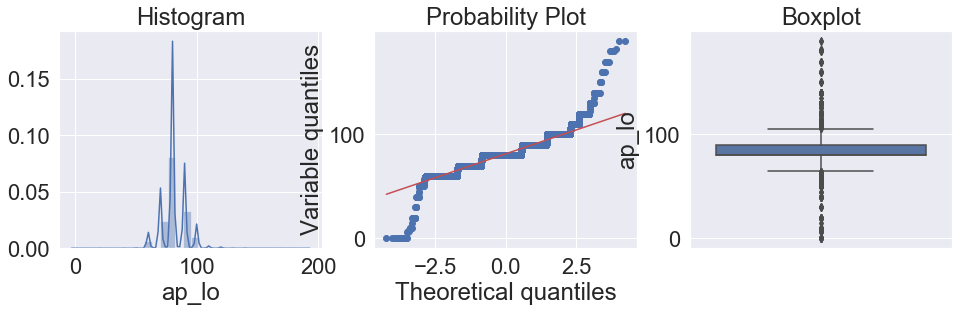

In [69]:
diagnostic_plots(Xtrain_trimmed, 'ap_lo')

In [70]:
X_train = Xtrain_trimmed
X_test = Xtest_trimmed

In [62]:
# capture all variables in a list
# except the target and `id`

train_vars = [var for var in X_train.columns if var not in ['id', 'cardio']]

# count number of variables
len(train_vars)

12

Decided to go with the Scikit-learn's [PowerTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer) (method=yeo-johnson) as this can potential outliers and negative values. PowerTransformer applies zero-mean, unit variance normalization to the transformed output and finds the optimal scaling factor to stabilize variance and minimize skewness through maximum likelihood estimation.

In [63]:
# Powertransf
scaler = PowerTransformer(method = 'yeo-johnson')

# fit scaler to train set
scaler.fit(X_train[train_vars])

# transform both sets
X_train[train_vars] = scaler.transform(X_train[train_vars])
X_test[train_vars] = scaler.transform(X_test[train_vars])

In [66]:
X_train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
53431,77210,0.747673,-0.731836,-0.563838,-1.236170,-0.130642,-0.104862,-0.580353,-0.420003,-0.310083,-0.238686,0.492295,1,-0.984313
23685,34837,1.761812,-0.731836,0.045301,-0.598215,-0.130642,-0.104862,-0.580353,-0.420003,-0.310083,-0.238686,-2.031301,1,-0.661910
27509,40324,0.301246,-0.731836,-0.201430,0.951618,-0.130642,-0.104862,-0.580353,-0.420003,-0.310083,-0.238686,-2.031301,0,1.059270
16661,24804,1.675128,-0.731836,-0.078578,1.651639,0.066358,-0.104862,-0.580353,-0.420003,-0.310083,-0.238686,0.492295,1,1.653725
43410,63022,-0.921671,1.366426,0.045301,-0.598215,-0.130642,-0.104862,1.651285,-0.420003,-0.310083,-0.238686,-2.031301,0,-0.661910


In [76]:
# # Transform NumPy arrays to DataFrames 

# X_train_scaled = pd.DataFrame(X_train_scaled, columns=Xtrain_trimmed[train_vars].columns)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns=Xtest_trimmed[train_vars].columns)

In [77]:
# np.round(Xtrain_trimmed.median(), 1)

In [78]:
# np.round(X_train_scaled.median(), 1)

In [79]:
# # compare variable distributions before and after scaling

# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# # before scaling
# ax1.set_title('Before Scaling')
# sns.kdeplot(Xtrain_trimmed['ap_hi'], ax=ax1)
# sns.kdeplot(Xtrain_trimmed['weight'], ax=ax1)
# sns.kdeplot(Xtrain_trimmed['bmi'], ax=ax1)

# # after scaling
# ax2.set_title('After Robust Scaling')
# sns.kdeplot(X_train_scaled['ap_hi'], ax=ax2)
# sns.kdeplot(X_train_scaled['weight'], ax=ax2)
# sns.kdeplot(X_train_scaled['bmi'], ax=ax2)
# plt.show()

In [67]:
# save the train and test sets for the next notebook!

X_train.to_csv('xtrain.csv', index=False)
X_test.to_csv('xtest.csv', index=False)

### Reinstantiate data to X_train and X_test

In [68]:
# load the train and test set with the engineered variables

# we built and saved these datasets in the previous lecture.
# If you haven't done so, go ahead and check the previous notebook
# to find out how to create these datasets

X_train = pd.read_csv('xtrain.csv')
X_test = pd.read_csv('xtest.csv')

X_train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,77210,0.747673,-0.731836,-0.563838,-1.236170,-0.130642,-0.104862,-0.580353,-0.420003,-0.310083,-0.238686,0.492295,1,-0.984313
1,34837,1.761812,-0.731836,0.045301,-0.598215,-0.130642,-0.104862,-0.580353,-0.420003,-0.310083,-0.238686,-2.031301,1,-0.661910
2,40324,0.301246,-0.731836,-0.201430,0.951618,-0.130642,-0.104862,-0.580353,-0.420003,-0.310083,-0.238686,-2.031301,0,1.059270
3,24804,1.675128,-0.731836,-0.078578,1.651639,0.066358,-0.104862,-0.580353,-0.420003,-0.310083,-0.238686,0.492295,1,1.653725
4,63022,-0.921671,1.366426,0.045301,-0.598215,-0.130642,-0.104862,1.651285,-0.420003,-0.310083,-0.238686,-2.031301,0,-0.661910


In [69]:
# capture the target (remember that the target is log transformed)
y_train = X_train['cardio']
y_test = X_test['cardio']

# drop unnecessary variables from our training and testing sets
X_train.drop(['id', 'cardio'], axis=1, inplace=True)
X_test.drop(['id', 'cardio'], axis=1, inplace=True)

With the data split into training and test sets, it's time for machine learning algorithm selection based on Classification.

    * Train it (find the patterns) on the training set.
    * Test it (use the patterns) on the test set.

Based on past success, I've chosen to use these 3 classification machine learning models:
1. Logistic Regression 
2. Random Forest Classifier
3. XgBoost Classifier

Set up function to instantiate and fit the models

In [70]:

# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier(),
          "XBG Classifier": xgb.XGBClassifier(objective ='reg:logistic')}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(8)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [71]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.7233551365909965,
 'Random Forest': 0.7144093882262409,
 'XBG Classifier': 0.7344170834936514}

`KNN` has the lowest score but I'll look to manually tweak the model by selecting ideal k-neighbors later in this notebook. The other 3 can be ranked as 1. `Logistic Regression` 2. `Random Forest` 3. `XGB Classifier` out of the box without parameter tuning.

### Model Comparison

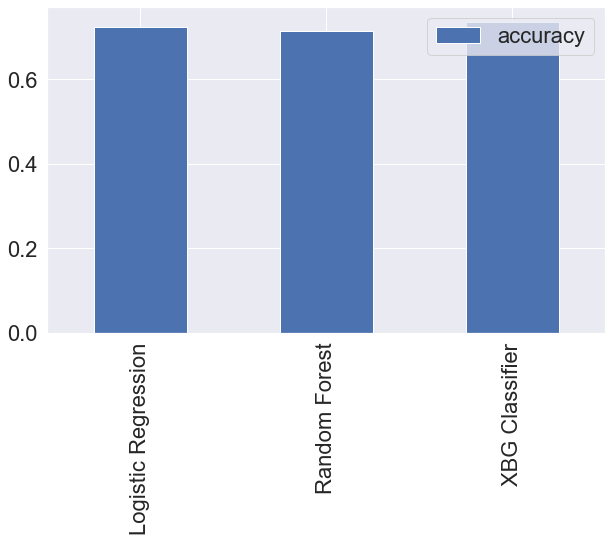

In [72]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(figsize=(10,6));

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:
* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning (by hand) for `KNN`

## Hyperparameter tuning with RandomizedSearchCV

Hyperparameter tuning of the top 3 models:
* LogisticRegression()
* RandomForestClassifier()
* XGBClassifier()

In [78]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

# Create a hyperparameter grid for XGBClassifier
xg_grid = {'n_estimators': st.randint(150, 1000),
              'learning_rate': st.uniform(0.01, 0.7),
              'subsample': st.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': st.uniform(0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4],
              'early_stopping_rounds': [10]
          }

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

### `LogisticRegression()`

In [79]:
# Tune LogisticRegression

np.random.seed(8)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [80]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 11.288378916846883}

In [81]:
rs_log_reg.score(X_test, y_test)

0.7234513274336283

### `RandomForestClassifier()`

In [82]:
# Setup random seed
np.random.seed(8)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 21.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [83]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 460,
 'min_samples_split': 6,
 'min_samples_leaf': 9,
 'max_depth': None}

In [84]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.7383609080415544

### `XGBClassifier()`

In [85]:
%%time 
# Setup random seed
np.random.seed(8)

# Setup random hyperparameter search for RandomForestClassifier
xg_rf = RandomizedSearchCV(xgb.XGBClassifier(objective="reg:logistic"), 
                           param_distributions=xg_grid,
                           cv = 30,  
                           n_iter = 30,
                           scoring = 'roc_auc',
                           error_score = 0,
                           verbose = 3, 
                           n_jobs = -1)
# Fit random hyperparameter search model for RandomForestClassifier()
xg_rf.fit(X_train, y_train)

Fitting 30 folds for each of 30 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed: 42.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 60.5min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 76.9min finished


Wall time: 1h 17min 4s


RandomizedSearchCV(cv=30, error_score=0,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F0FF5BA970>,
                                        'max_de

In [86]:
# Find the best hyperparameters
xg_rf.best_params_

{'colsample_bytree': 0.901249477568232,
 'early_stopping_rounds': 10,
 'learning_rate': 0.07998244107260201,
 'max_depth': 5,
 'min_child_weight': 4,
 'n_estimators': 522,
 'subsample': 0.841003510568888}

In [87]:
# Evaluate the randomized search RandomForestClassifier model
xg_rf.score(X_test, y_test)

0.8038691962990094

### RESULTS

In [88]:
print('Summary of scores for the 3 models using RandomSearchCV')
print(f'LogisticRegression: {rs_log_reg.score(X_test, y_test)}')
print(f'RandomForestClassifier: {rs_rf.score(X_test, y_test)}')
print(f'**XGBClassifier: {xg_rf.score(X_test, y_test)}**')

Summary of scores for the 3 models using RandomSearchCV
LogisticRegression: 0.7234513274336283
RandomForestClassifier: 0.7383609080415544
**XGBClassifier: 0.8038691962990094**


🎯 The XGBClassifier qualifies for the initial performance measure of 79% evaluation accuracy at predicting whether or not a patient has heart disease. Still not satisfied, let's see how we can improve the model even if only slightly. In the case of predicting heart disease, the accuracy of the model should continually be fine-tuned especially in regards to false-negatives that is not accurately predicting heart disease in a patient when they in fact do. The evaluation metric RECALL specifies the number of false-negatives where a score of 1.0 means the model produced no false negatives. 

## Hyperparamter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [ ]:
# # Different hyperparameters for our LogisticRegression model
# log_reg_grid = {"C": np.logspace(-4, 4, 30),
#                 "solver": ["liblinear"]}

# # Setup grid hyperparameter search for LogisticRegression
# gs_log_reg = GridSearchCV(LogisticRegression(),
#                           param_grid=log_reg_grid,
#                           cv=5,
#                           verbose=True)

# # Fit grid hyperparameter search model
# gs_log_reg.fit(X_train, y_train);

In [89]:
%%time
# Create a hyperparameter grid for XGBClassifier

xg_grid = {'n_estimators': [i for i in range(150, 800, 30)],
              'learning_rate': np.arange(0.01, 0.7),
              'subsample': np.arange(0.2, 0.7),
              'max_depth': [1, 2, 3, 4, 5, 6, 7],
              'colsample_bytree': np.arange(0.5, 0.9),
              'early_stopping_rounds': [10],
              'min_child_weight': [1, 2, 3, 4, 5, 6]
             }

# Setup grid hyperparameter search for LogisticRegression
gs_xgboost = GridSearchCV(xgb.XGBClassifier(objective="reg:logistic"),
                          param_grid=xg_grid,
                          scoring = 'roc_auc',
                          error_score = 0,
                          cv=3,
                          verbose=True)

# Fit grid hyperparameter search model
gs_xgboost.fit(X_train, y_train);

Fitting 3 folds for each of 924 candidates, totalling 2772 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2772 out of 2772 | elapsed: 241.0min finished


Wall time: 4h 1min 13s


GridSearchCV(cv=3, error_score=0,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimat...
             param_grid={'colsample_bytree': array([0.5]),
                         'early_stopping_rounds': [10],
                         'learning_rate': array([0.01]),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'min_child_weight': [1, 2

In [90]:
# Check the best hyperparmaters
gs_xgboost.best_params_

{'colsample_bytree': 0.5,
 'early_stopping_rounds': 10,
 'learning_rate': 0.01,
 'max_depth': 5,
 'min_child_weight': 2,
 'n_estimators': 780,
 'subsample': 0.2}

In [91]:
gs_xgboost.best_estimator_
# gs_xgboost

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=10, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=780, n_jobs=0, num_parallel_tree=1,
              objective='reg:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.2, tree_method=None,
              validate_parameters=False, verbosity=None)

In [92]:
# Evaluate the grid search LogisticRegression model
gs_xgboost.score(X_test, y_test)

0.806694473805019

💾 Save tuned `XGBClassifier()` model 

In [101]:
import pickle

pickle.dump(gs_xgboost, open("gs_xgboost.pkl","wb"))

## Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [93]:
# Make predictions with tuned model
y_preds = gs_xgboost.predict(X_test)

In [94]:
y_preds

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [95]:
y_test

0        0
1        1
2        0
3        1
4        0
        ..
10391    0
10392    0
10393    1
10394    0
10395    1
Name: cardio, Length: 10396, dtype: int64

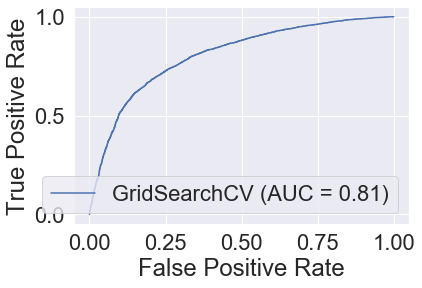

In [96]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(gs_xgboost, X_test, y_test)

The ROC curve plots the true positive rate against the false positive rate at various threshold settings. The AUC score of 0.94 indicates that 94% of the area under the curve is filled where an AUC score of 1.0 would represent a perfect 90 degree elbow at the top-left portion of the curve. 

In [97]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[4083 1156]
 [1564 3593]]


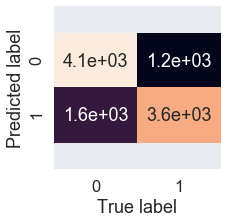

In [98]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

Remember earlier regardless of the accuracy score, another goal is to minimize the false-negative rate (predicted label=0 where true label=1) as it implies a patient with a heart disease condition that isn't being treated. In this case, 5 patients fall into the realm of false-negatives. No model is perfect and it's important to investigate how to continue minimizing until the model minimizes the false-negatives rates even further. This can be achieved by reintroducing new features by discussing which features may have lead to the underdiagnoses conditions by speaking to team doctors. 

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [99]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      5239
           1       0.76      0.70      0.73      5157

    accuracy                           0.74     10396
   macro avg       0.74      0.74      0.74     10396
weighted avg       0.74      0.74      0.74     10396



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [100]:
# Check best hyperparameters
gs_xgboost.best_params_

{'colsample_bytree': 0.5,
 'early_stopping_rounds': 10,
 'learning_rate': 0.01,
 'max_depth': 5,
 'min_child_weight': 2,
 'n_estimators': 780,
 'subsample': 0.2}

In [101]:
# Create a new classifier with best parameters
clf = xgb.XGBClassifier(objective = "reg:logistic", 
                        colsample_bytree = 0.5,
                        learning_rate = 0.01,
                        max_depth = 3,
                        min_child_weight = 1,
                        n_estimators = 150,
                        subsample = 0.3)

In [102]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X_test,
                         y_test,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.73173077, 0.72438672, 0.73496873, 0.72727273, 0.73641174])

In [103]:
cv_acc = np.mean(cv_acc)
cv_acc

0.7309541384541385

In [104]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X_test,
                         y_test,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.7661128732714209

In [105]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X_test,
                         y_test,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.658905330115264

In [106]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X_test,
                         y_test,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.708395731456729

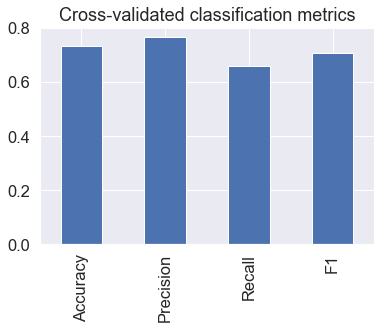

In [107]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

### Feature Importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [118]:
# Fit an instance of LogisticRegression
clf.fit(X_train, y_train);

In statistical analysis of binary classification, the [F score](https://en.wikipedia.org/wiki/F1_score) (also F1-score or F-measure) is a measure of a test's accuracy. It considers both the precision p and the recall r of the test to compute the score. The score is the harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall).

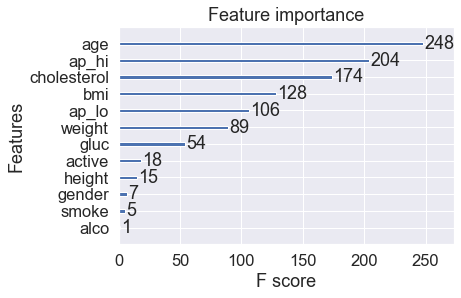

In [119]:
from xgboost import plot_importance
plot_importance(clf);

Identified during EDA, max heart rate, exercised-induced angina, chest pain, cholesterol, and age were all factors in predicting heart disease. The metrics of feature importance indicate a more conclusive look at possible identifying attributes towards predicting the target variable. Invariably, negative correlations can have significant meaning as well especially when considering feature importance. Since xgboost factors decisions based on decision trees and it's hard to identify strong negative correlation in this respect, I'll be using the next most accurate model `logisticRegression()`. 

#### Checking correlations with `LinearRegression()` model

In [ ]:
# Check best hyperparameters
rs_log_reg.best_params_

In [ ]:
# Instantiate best model with best hyperparameters (found with RandomSearchCV)
log_clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

# fit an instance of LogisticRegression
log_clf.fit(X_train, y_train);

# check coef_
log_clf.coef_

Deciphering the output array, the values determine how much (or litte) each feature contributes to the model's decision making for whether patterns exist in a sample of the patients' health data. Combining the features to the coef_ array allows for depicting and visualizing the feature importances. 

In [ ]:
### Match features to columns
features_dict = dict(zip(df.columns, list(log_clf.coef_[0])))
features_dict

In [ ]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

It's now more evident to see that [sex], [exang], [oldpeak], [ca], and [thal] contribute to stronger negative correlations. I think the features selected from `xgbRegressor()` were accurate for defining the variables that are perceived to influence the decision for the target variable equaling zero or one (heart disease or no heart disease). Again, many of those same features were understood from EDA to measuring the impact of individual features since it's relatively common knowledge that cholesterol, heart rate conditions, exercise, etc. all play a significant factor towards one's susceptibility towards heart conditions. 

## 6. Final Analysis 🌠

It's now more evident to see that [sex], [exang], [oldpeak], [ca], and [thal] contribute to stronger negative correlations. I think the features selected from `xgbRegressor()` were accurate for defining the variables that are perceived to influence the decision for the target variable equaling zero or one (heart disease or no heart disease). Again, many of those same features were understood from EDA to measuring the impact of individual features since it's relatively common knowledge that cholesterol, heart rate conditions, exercise, etc. all play a significant factor towards one's susceptibility towards heart conditions. Even though gender [sex] shows a strong negative correlation, it would require further real-world investigation of why females seem more patients in this particular dataset have underlying heart conditions. For the sake of simplicity, I'm going presume a much larger dataset with variability in data would negate this specific correlation. My next project will be a similar premise (working with predicting heart disease) but with a larger, imbalanced dataset. 




